只通过线性变换，任意层的全连接神经网络和单层神经网络模型的表达能力没有任何区别

交叉熵（cross entropy）刻画了两个概率分布之间的距离，交叉熵不是对称的，刻画的是通过概率分布q来表达概率分布p的困难程度，
其中，p为正确答案，q代表的是预测值，交叉熵越小，两个概率分布越接近；
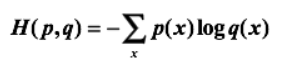

tf.clip_by_value(A, min, max)：输入一个张量A，把A中的每一个元素的值都压缩在min和max之间，这样就不会出现log0的错误。
 

In [7]:
import tensorflow as tf
v1 = tf.constant([1.0, 2.0, 3.0, 4.0])
v2 = tf.constant([4.0, 3.0, 2.0, 1.0])

sess = tf.InteractiveSession()
print(tf.greater(v1, v2).eval())

print(tf.where(tf.greater(v1, v2), v1, v2).eval())
sess.close()

[False False  True  True]
[4. 3. 3. 4.]


In [12]:
import tensorflow as tf
from numpy.random import RandomState

batch_size = 8
#两个输入节点
x = tf.placeholder(tf.float32, shape=(None, 2), name='x-input')
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')

#定义一个单层的神经网络前向传播的过程，这里就是简单加权和
w1 = tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w1)

#定义预测多了和预测少了的成本
loss_less = 10
loss_more = 1
loss = tf.reduce_mean(tf.where(tf.greater(y, y_), (y - y_)*loss_more, (y_ - y)*loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

#通过随机数生成一个模拟数据集
rdm = RandomState(1)
dataset_size = 128
X = rdm.rand(dataset_size, 2)
Y = [[x1+x2+rdm.rand()/10.0 - 0.05] for (x1, x2) in X]

#训练神经网络
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i * batch_size) % dataset_size
        end = min(start + batch_size, dataset_size)
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y[start:end]})
        #print(sess.run(w1))
    print(sess.run(w1))
    

[[1.0193471]
 [1.0428091]]


In [ ]:
tf.train.exponential_decay 函数实现了指数衰减学习率

In [ ]:
import tensorflow as tf

def get_weight(shape, lambda):
    var = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambda)(var))
    return var

x = tf.placeholder(tf.float32, shape=[None, 2], name='x-input')
y_ = tf.placeholder(tf.float32, shape=[None, 2], name='y-input')
batch_size = 8
layer_dimension = [2, 10, 10, 10, 1] # 定义了没一层网络中节点的数目
n_layers = len(layer_dimension) #神经网络的层数

cur_layers = x
in_dimension = layer_dimension[0]

#通过一个循环来生成5层全连接的神经网咯结构
for i in range(1, n_layers):
    out_dimension = layer_dimension[i]
    weight = get_weight([in_dimension, out_dimension], 0.001)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dimension]))
    cur_layer = tf.nn.rule(tf.matmul(cur_layers, weight) + bias)
    in_dimension = layer_dimension[i]

mse_loss = tf.reduce_mean(tf.square(y_ - cur_layer))

tf.add_to_collection('losses', mse_lose)

loss = tf.add_n(tf.get_collection('losses'))